<a href="https://colab.research.google.com/github/tawadev/AdvanceSteel/blob/master/Hands_on_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installation of Detectron2

In [1]:
!python -m pip install \
'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-wvvve68r
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-wvvve68r
  Resolved https://github.com/facebookresearch/detectron2.git to commit e8806d607403cf0f2634d4c5ac464109fdc7d4af
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 87.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 21.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for detectron2: filename=detectron2-0.6-cp310-cp310-linux_x86_64.whl size=6172771 sha256=a6216f92afb84bc10f8ca02b6bfe

## Get a predictor

In [2]:
import warnings
warnings.simplefilter(action='ignore',category='UserWarning')

In [1]:
import torch
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)

torch:  2.3 ; cuda:  cu121


In [2]:
import detectron2
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
# We suppress some user warnings
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
# Create a configuration and a predictor
def get_predictor(config_file, checkpoint_url, score_thresh_test=0.5):
  # create a configuration object
  cfg = get_cfg()
  # get the configurations from the config_file
  config_file = model_zoo.get_config_file(config_file)
  cfg.merge_from_file(config_file)
  # get the pre-built weights of a trained model from the checkpoint
  cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(checkpoint_url)
  # set the threshold for recall vs. precision at test time
  cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = score_thresh_test
  # create a predictor
  predictor = DefaultPredictor(cfg)
  return cfg, predictor

## Perform interface

In [3]:
import cv2
from google.colab.patches import cv2_imshow
def perform_inference(predictor, input_url):
  img = cv2.imread(input_url)
  output = predictor(img)
  return img, output

## Visualization

In [4]:
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
# computer vision tasks
OBJECT_DETECTION = 0
INSTANCE_SEGMENTATION = 1
KEYPOINT_DETECTION = 2
SEMANTIC_SEGMENTATION = 3
PANOPTIC_SEGMENTATION = 4

def visualize_output(img, output, cfg, task=OBJECT_DETECTION, scale=1.0):
  v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=scale)
  if task == PANOPTIC_SEGMENTATION:
    panoptic_seg, segments_info = output["panoptic_seg"]
    annotated_img = v.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"), segments_info)
  elif task == SEMANTIC_SEGMENTATION:
    sem_seg = output["sem_seg"].argmax(dim=0)
    annotated_img = v.draw_sem_seg(sem_seg.to("cpu"))
  else:
    annotated_img = v.draw_instance_predictions(output["instances"].to("cpu"))
  cv2_imshow(annotated_img.get_image()[:, :, ::-1])

In [28]:
!wget #https://miro.medium.com/v2/resize:fit:1400/format:webp/1*0D9CEfI-p9zLBg2YxfqSIw.jpeg

wget: missing URL
Usage: wget [OPTION]... [URL]...

Try `wget --help' for more options.


## Object Detection

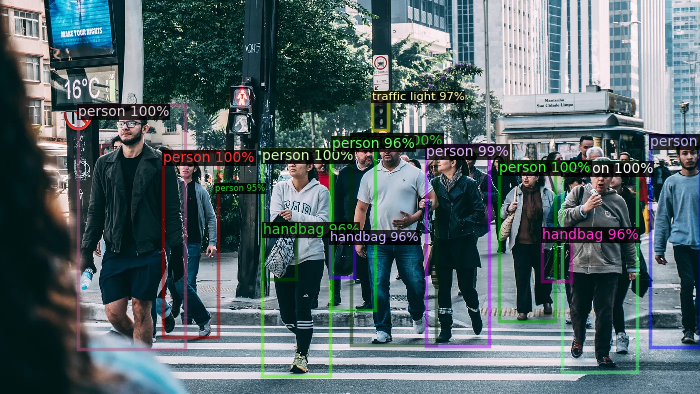

In [29]:
config_file = "COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"
checkpoint_url = "COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"
score_thresh_test = 0.95
input_url = "1*0D9CEfI-p9zLBg2YxfqSIw.jpeg"
task = OBJECT_DETECTION
scale = 0.5
# get a predictor
cfg, predictor = get_predictor(config_file, checkpoint_url, score_thresh_test)
# perform inference
img, output = perform_inference(predictor, input_url)
# visualization
visualize_output(img, output, cfg, task, scale)

## Instance segmentation


model_final_a3ec72.pkl: 254MB [00:00, 256MB/s]                           


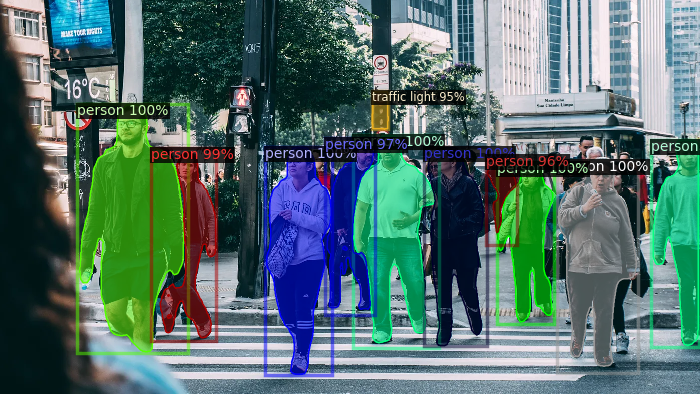

In [30]:
config_file = "COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml"
checkpoint_url = "COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml"
score_thresh_test = 0.95
input_url = "1*0D9CEfI-p9zLBg2YxfqSIw.jpeg"
task = INSTANCE_SEGMENTATION
scale = 0.5
# get a predictor
cfg, predictor = get_predictor(config_file, checkpoint_url, score_thresh_test)
# perform inference
img, output = perform_inference(predictor, input_url)
# visualization
visualize_output(img, output, cfg, task, scale)

## Key-point detection

model_final_997cc7.pkl: 313MB [00:01, 190MB/s]                           


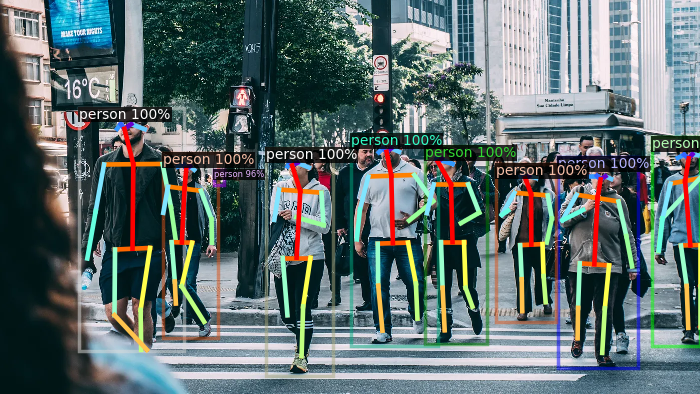

In [31]:
config_file = "COCO-Keypoints/keypoint_rcnn_R_101_FPN_3x.yaml"
checkpoint_url = "COCO-Keypoints/keypoint_rcnn_R_101_FPN_3x.yaml"
score_thresh_test = 0.95
input_url = "1*0D9CEfI-p9zLBg2YxfqSIw.jpeg"
task = KEYPOINT_DETECTION
scale = 0.5
# get a predictor
cfg, predictor = get_predictor(config_file, checkpoint_url, score_thresh_test)
# perform inference
img, output = perform_inference(predictor, input_url)
# visualization
visualize_output(img, output, cfg, task, scale)

## Semantic Segmentation


model_final_cafdb1.pkl: 261MB [00:00, 319MB/s]                           


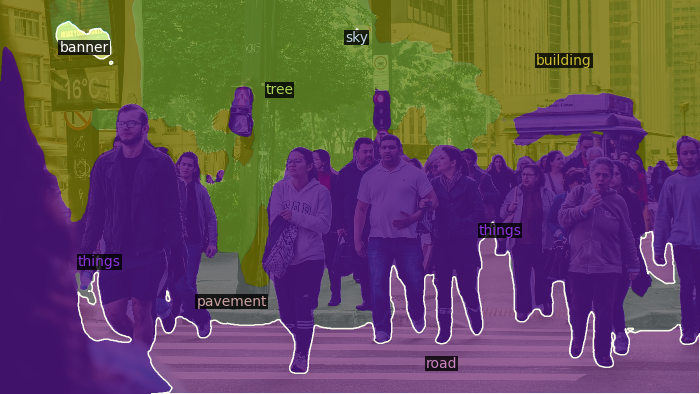

In [32]:
config_file = "COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"
checkpoint_url = "COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"
score_thresh_test = 0.95
input_url = "1*0D9CEfI-p9zLBg2YxfqSIw.jpeg"
task = SEMANTIC_SEGMENTATION
scale = 0.5
# get a predictor
cfg, predictor = get_predictor(config_file, checkpoint_url, score_thresh_test)
# perform inference
img, output = perform_inference(predictor, input_url)
# visualization
visualize_output(img, output, cfg, task, scale)

## Panoptic Segmentation


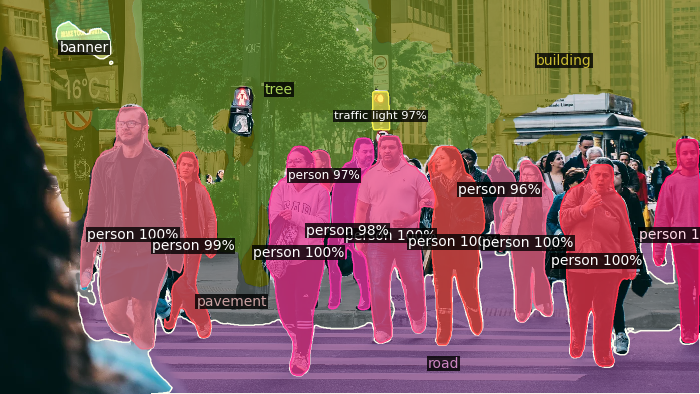

In [33]:
config_file = "COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"
checkpoint_url = "COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"
score_thresh_test = 0.95
input_url = "1*0D9CEfI-p9zLBg2YxfqSIw.jpeg"
task = PANOPTIC_SEGMENTATION
scale = 0.5
# get a predictor
cfg, predictor = get_predictor(config_file, checkpoint_url, score_thresh_test)
# perform inference
img, output = perform_inference(predictor, input_url)
# visualization
visualize_output(img, output, cfg, task, scale)